Column Names in Dataset: Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

Dataset Preview:
   Label  Message
0    0.0        0
1    0.0        8
2    0.0        0
3    0.0        0
4    0.0        7

🔹 Model Accuracy: 1.0000

🔹 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1035

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


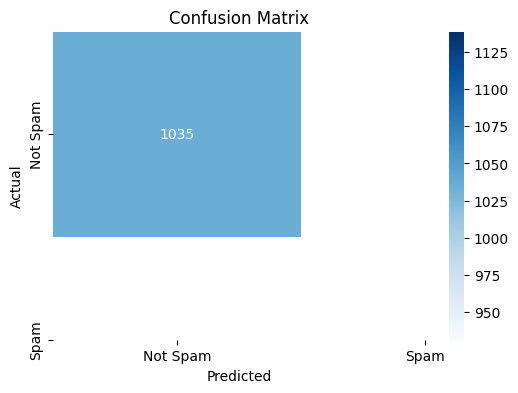

In [18]:
# ✅ Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Load dataset (SMS Spam Collection)
url = "/content/emails.csv"
df = pd.read_csv(url, encoding='latin-1')

# ✅ Check the dataset structure
print("Column Names in Dataset:", df.columns)

# ✅ Select the correct columns (fixing KeyError)
# Assuming the first column is the label and the second column is the message
df = df[[df.columns[0], df.columns[1]]]  # Selecting the first two columns by index
df.columns = ['Label', 'Message']  # Renaming for clarity

# ✅ Convert Labels to Binary (spam = 1, not spam = 0)
# Handle NaN values by filling with a default value (e.g., 0 for 'ham')
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1}).fillna(0)

# ✅ Display first few rows
print("\nDataset Preview:")
print(df.head())

# ✅ Split dataset into Training (80%) & Testing (20%)
# Convert 'Message' column to string type to avoid AttributeError
X_train, X_test, y_train, y_test = train_test_split(df['Message'].astype(str), df['Label'], test_size=0.2, random_state=42)

# ✅ Convert text data into numerical features using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Keeping top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ✅ Train a Naive Bayes Classifier (Best for text classification)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# ✅ Make Predictions on Test Data
y_pred = model.predict(X_test_tfidf)

# ✅ Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Model Accuracy: {accuracy:.4f}")

# ✅ Display Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()